In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:

data = pd.read_csv('/content/data (1).csv')

data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = DecisionTreeClassifier(max_depth=1)
base_model.fit(X_train, y_train)
ada_model = AdaBoostClassifier(estimator=base_model, n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)
base_pred = base_model.predict_proba(X_test)[:,1]
ada_pred = ada_model.predict_proba(X_test)[:,1]

base_roc_auc = roc_auc_score(y_test, base_pred)
ada_roc_auc = roc_auc_score(y_test, ada_pred)


                Model   ROC AUC
0  Base Decision Tree  0.897150
1            AdaBoost  0.992139


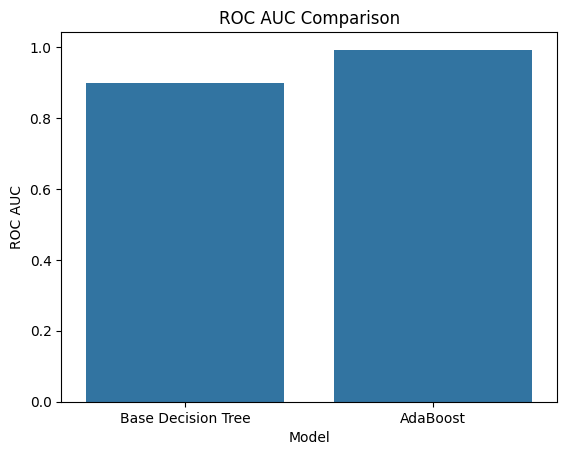


AdaBoost's ROC AUC is 0.095 higher than the base model.


In [3]:

comparison = pd.DataFrame({
    'Model': ['Base Decision Tree', 'AdaBoost'],
    'ROC AUC': [base_roc_auc, ada_roc_auc]
})

print(comparison)

sns.barplot(x='Model', y='ROC AUC', data=comparison)
plt.title('ROC AUC Comparison')
plt.show()

print(f"\nAdaBoost's ROC AUC is {ada_roc_auc - base_roc_auc:.3f} higher than the base model.")
